In [33]:
import pandas as pd
import numpy as np
import scipy.stats
import math
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns


In [34]:
###set file for imports
t='_d2_v2'

In [35]:
##### import GAMS results
#########ra characteristics

hhtrn0_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/hhtrn0_d_rpt.csv'%t)
del hhtrn0_d_rpt['file']
hhtrn0_d_rpt=hhtrn0_d_rpt.groupby(['r','h','sk'],as_index=False).sum()

#savings
sav0_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/sav0_d_rpt.csv'%t)
del sav0_d_rpt['file']

#labor tax rate
tl0_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/tl0_d_rpt.csv'%t)
del tl0_d_rpt['file']

#updated capital endowment
ke0_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/ke0_d_rpt.csv'%t)
del ke0_d_rpt['file']

#initial labor endowment
le0_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/le0_d_rpt.csv'%t)
del le0_d_rpt['file']

#new labor endowment
le0_d_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/le0_d_rpt0.csv'%t)
del le0_d_rpt0['file']

#cons0_rpt(r,h,sk)=c0_h_d(r,h,sk);
cons0_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/cons0_rpt.csv'%t)
del cons0_rpt['file']

####cons demand benchmark
cd0_h_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/cd0_h_d_rpt.csv'%t)
del cd0_h_d_rpt['file']

####sector labor demand by skill
ld0_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/ld0_d_rpt.csv'%t)
# del ld0_d_rpt['file']

ys0_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/ys0_rpt.csv'%t)
del ys0_rpt['file']

kd0_rpt= pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/kd0_rpt.csv'%t)
del kd0_rpt['file']

###intermediate goods demand


id0_rpt= pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/id0_rpt.csv'%t)
del id0_rpt['file']

###INITIAL LABOR SUPPLY
labor_b=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/le0_d_rpt00.csv'%t)
labor_b=labor_b[['file','region','household','benchmark_le0','skill']].reset_index()
labor_b=labor_b.rename(columns={'file':'r','region':'q','skill':'sk','household':'h'})
del labor_b['index']
shares=pd.read_csv('/Users/hannahkamen/Downloads/le0_shr2.csv')

shares_u=shares.drop_duplicates(subset=['q','h','sk']).pivot(index=['q','h'],columns='sk',values='skill_shr').reset_index()
shares_u['diff']=shares_u['skl']-shares_u['unskl']

shocks=pd.read_csv('/Users/hannahkamen/Downloads/le0_shock0_v2_test2_adj.csv')
shocks=shocks.rename(columns={'skill_shr':'pct_shock'})
shocks_lm=shocks[(shocks['r']==shocks['q'])]


In [36]:
shocks_lm=shocks_lm.sort_values(by=['sk','pct_shock'],ascending=True).drop_duplicates(subset=['r','sk'])
shocks_lm_pvt=shocks_lm.pivot_table(index='r',columns='sk',values='pct_shock').reset_index()
shocks_lm_pvt['difference']=shocks_lm_pvt['skl']-shocks_lm_pvt['unskl']

In [37]:
ld0_d_rpt=ld0_d_rpt.rename(columns={'file':'region'})
ld0_d_rpt_pvt=ld0_d_rpt.pivot_table(index=['region','sector'],columns='skill',values='benchmark_ld0').reset_index()
###group intermediate inputs
id0_rpt_gr=id0_rpt.groupby(by=['region','sector'],as_index=False).sum()

####mergewith capital
int_goods=ld0_d_rpt_pvt.merge(kd0_rpt,on=['region','sector'],how='inner').merge(id0_rpt_gr,on=['region','sector'],how='inner')

sorter=shocks_lm_pvt.sort_values(by='difference',ascending=True)['r']

#### get intensity of each good by capital, intermediate goods, and labor type

In [38]:
###get top budget good nationwide

cd0_gr=cd0_h_d_rpt.groupby(['region','good'],as_index=False).sum()

cd0_gr_tot=cd0_h_d_rpt.groupby(['region'],as_index=False).sum()
cd0_gr_tot=cd0_gr_tot.rename(columns={'benchmark_disagg_cons':'benchmark_disagg_cons_tot'})

cd0_gr=cd0_gr.merge(cd0_gr_tot,on=['region'],how='inner')
cd0_gr['pct_budget']=cd0_gr['benchmark_disagg_cons']/cd0_gr['benchmark_disagg_cons_tot']

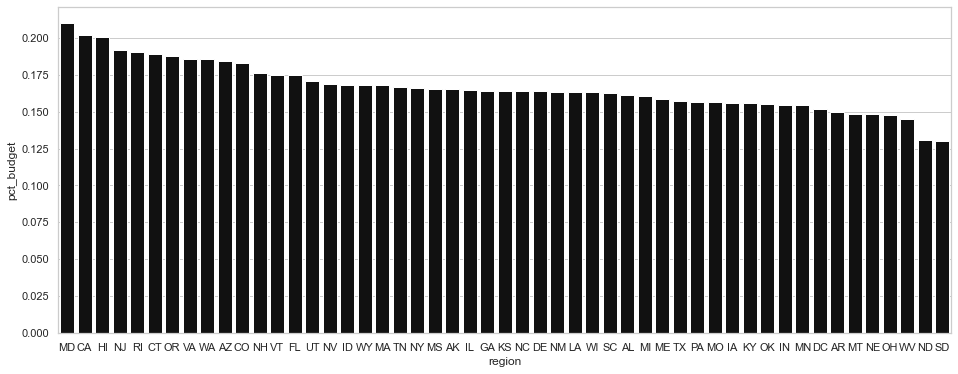

In [39]:
cd0_gr_hou=cd0_gr[cd0_gr['good']=='hou']

###plot
fig, ax = plt.subplots(1, 1,figsize=(16,6))
cd0_gr_hou=cd0_gr_hou.sort_values(by='pct_budget',ascending=False)

sns.set_theme(style="whitegrid")
g = sns.barplot(
    data=cd0_gr_hou,
    x="region", y='pct_budget',
   palette=['#111111']
)


In [78]:
cd0_exp_skl

,region,good,skill,benchmark_disagg_cons
0,AK,adm,skl,0.118207
1,AK,adm,unskl,0.061492
2,AK,agr,skl,0.208734
3,AK,agr,unskl,0.092974
4,AK,air,skl,0.201022
...,...,...,...,...
5911,WY,wrh,unskl,0.000091
5912,WY,wst,skl,0.027828
5913,WY,wst,unskl,0.018982
5914,WY,wtt,skl,0.022094


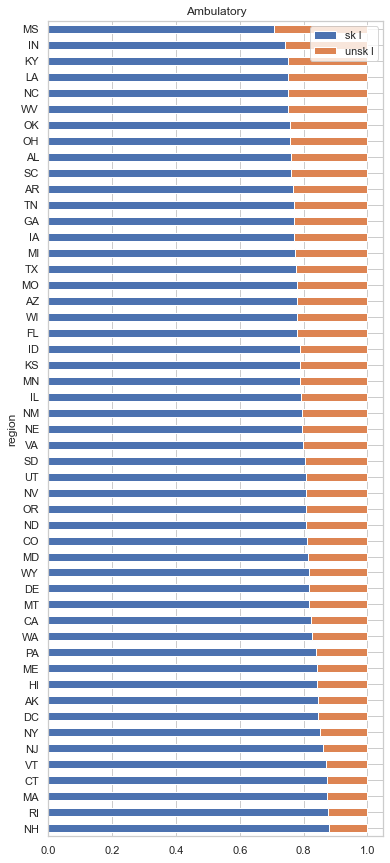

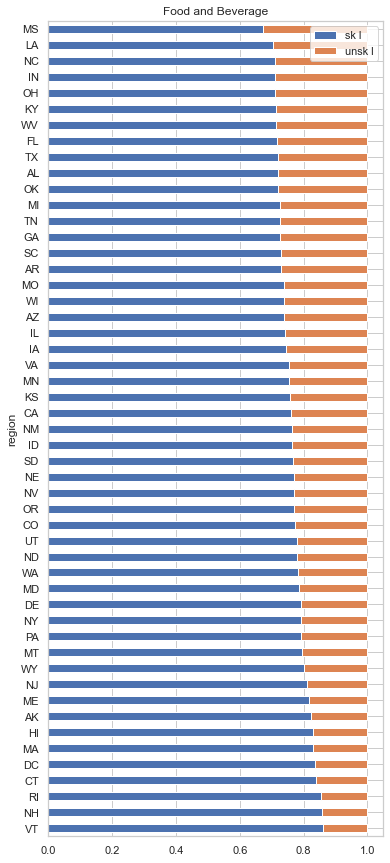

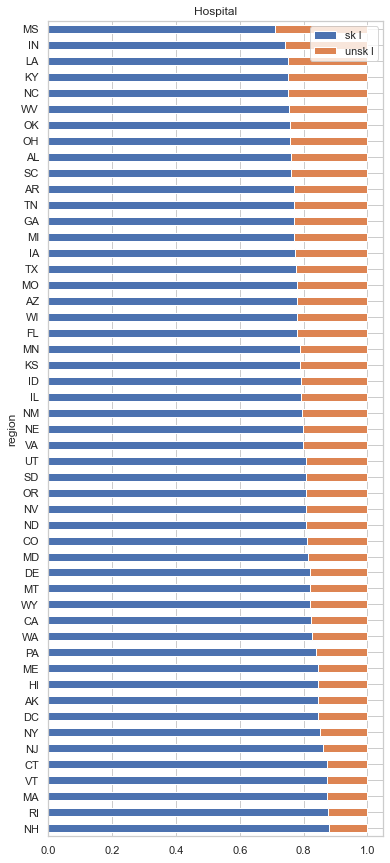

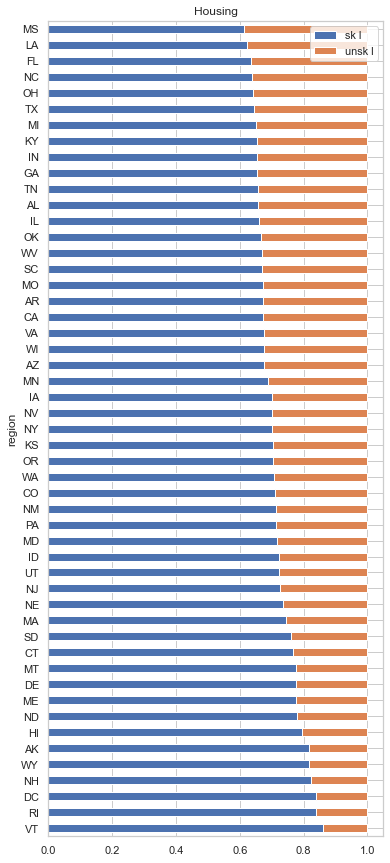

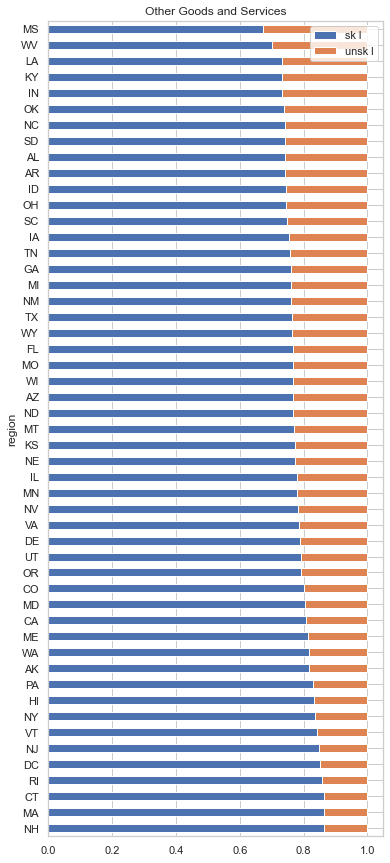

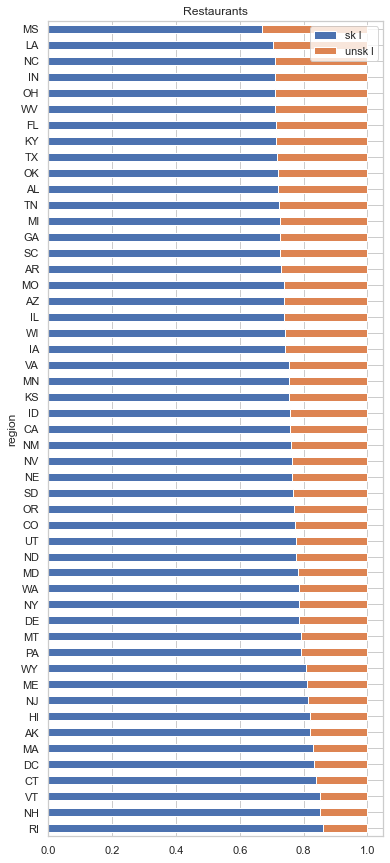

In [91]:
##get expenditure by skill type and good
cd0_exp_skl=cd0_h_d_rpt.groupby(['region','good','skill'],as_index=False).sum()
cd0_exp_skl_tot=cd0_h_d_rpt.groupby(['region','good'],as_index=False).sum()
cd0_exp_skl_tot=cd0_exp_skl_tot.rename(columns={'benchmark_disagg_cons':'benchmark_disagg_cons_tot'})
cd0_exp_skl=cd0_exp_skl.merge(cd0_exp_skl_tot,on=['region','good'])
cd0_exp_skl['pct_exp']=cd0_exp_skl['benchmark_disagg_cons']/cd0_exp_skl['benchmark_disagg_cons_tot']

cd0_exp_skl_pvt=cd0_exp_skl.pivot_table(index=['region','good'],columns='skill',values='pct_exp').reset_index()

for goods,lab in zip(['amb','fbp','hos','hou','osv','res'],['Ambulatory','Food and Beverage','Hospital','Housing','Other Goods and Services','Restaurants']):
    
    fig, ax = plt.subplots(1, 1,figsize=(6,15))
    cd0_exp_skl_lm=cd0_exp_skl_pvt[cd0_exp_skl_pvt['good']==goods]
    cd0_exp_skl_lm=cd0_exp_skl_lm.sort_values(by='skl',ascending=False)
    
#     del cd0_exp_skl_lm['benchmark_disagg_cons_tot']
    cd0_exp_skl_lm.set_index('region').plot(kind='barh', stacked=True,ax=ax)
    plt.title(lab)
    plt.legend(labels=['sk l','unsk l','capital','int good'])


<AxesSubplot:xlabel='sector'>

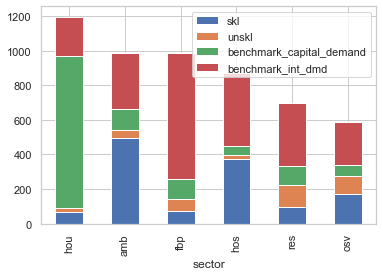

In [40]:
int_goods_gr=int_goods.groupby('sector',as_index=False).sum()
int_goods_gr['total']=int_goods_gr.sum(axis=1)
int_goods_gr=int_goods_gr.sort_values(by='total',ascending=False)
del int_goods_gr['total']
top_goods_list=['hou', 'hos', 'amb', 'res', 'fbp', 'osv']


int_goods_top=int_goods_gr[ (int_goods_gr['sector'].isin(top_goods_list))]
int_goods_top.set_index('sector').plot(kind='bar', stacked=True)

In [41]:
cd0_gr_new=cd0_gr.rename(columns={'good':'sector'})[['region','sector','pct_budget']]

In [42]:
int_goods['total']=int_goods.sum(axis=1)

int_goods=int_goods.merge(cd0_gr_new,on=['region','sector'],how='inner')

int_goods['pct_skl']=int_goods['skl']/int_goods['total']
int_goods['pct_unskl']=int_goods['unskl']/int_goods['total']
int_goods['pct_capital_demand']=int_goods['benchmark_capital_demand']/int_goods['total']
int_goods['pct_int_demand']=int_goods['benchmark_int_dmd']/int_goods['total']


int_goods['skl_exp']=int_goods['pct_skl']*int_goods['pct_budget']
int_goods['unskl_exp']=int_goods['pct_unskl']*int_goods['pct_budget']
int_goods['capital_demand_exp']=int_goods['pct_capital_demand']*int_goods['pct_budget']
int_goods['int_demand_exp']=int_goods['pct_int_demand']*int_goods['pct_budget']

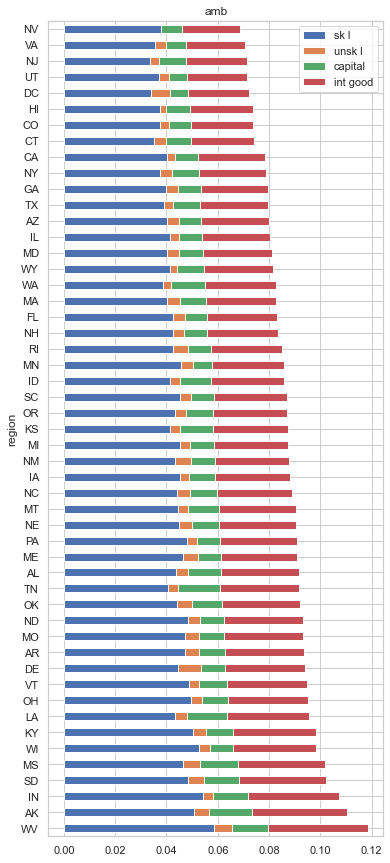

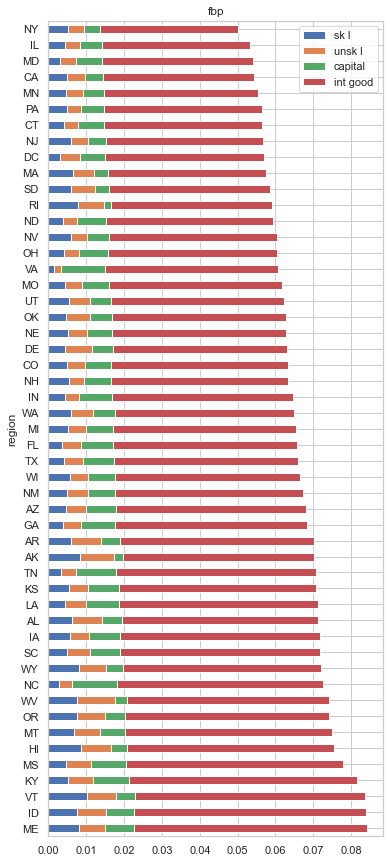

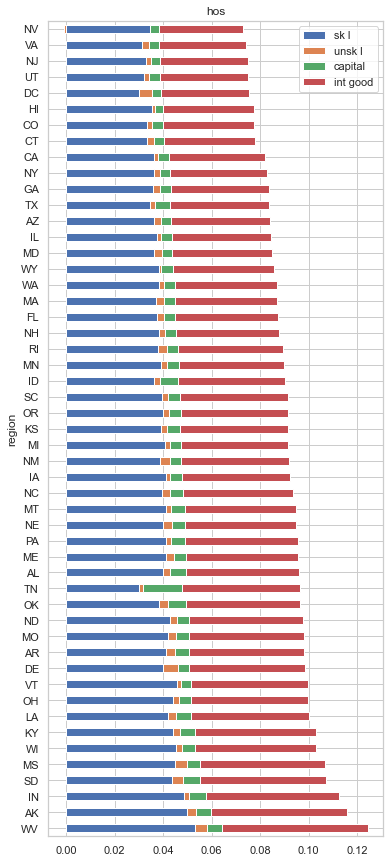

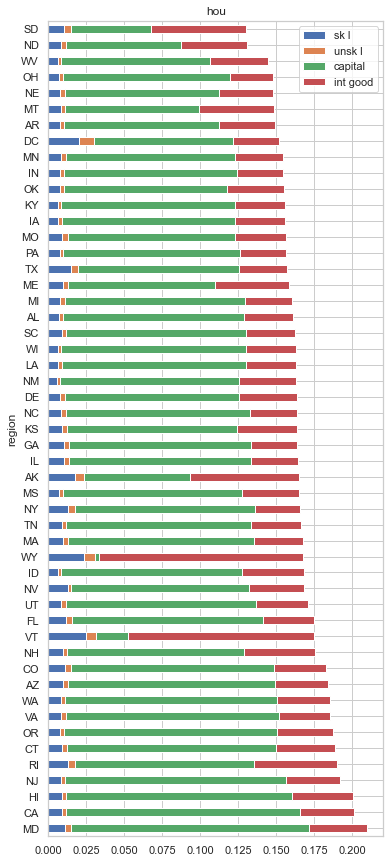

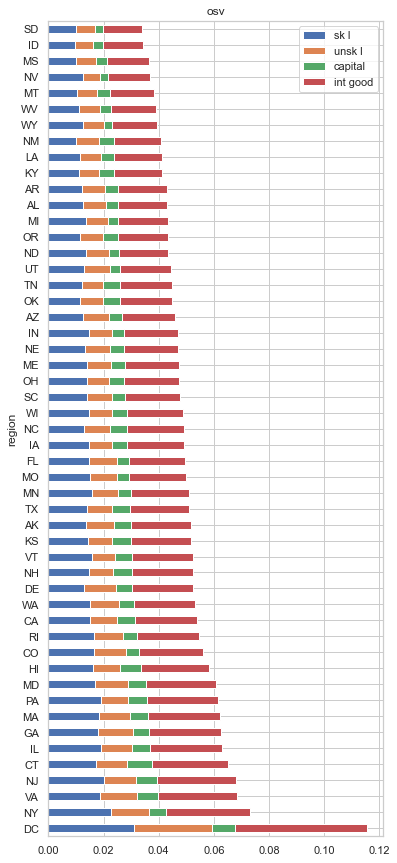

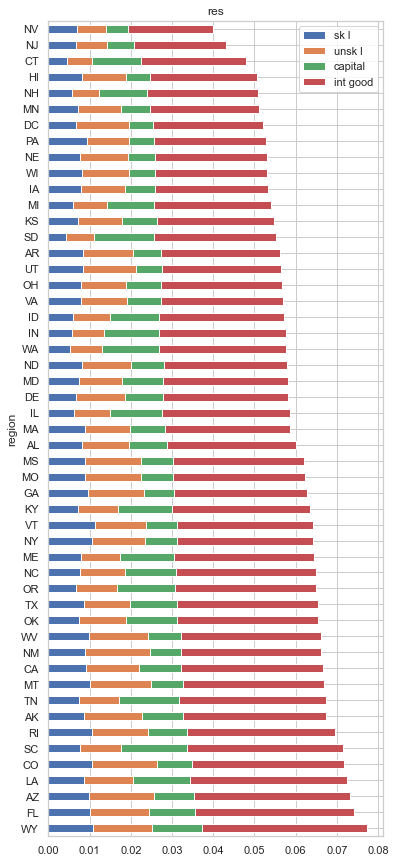

In [71]:
int_goods_lm=int_goods[['region','sector','skl_exp','unskl_exp','capital_demand_exp','int_demand_exp']]
int_goods_lm=int_goods_lm[int_goods_lm['sector'].isin(top_goods_list)]

for goods in ['amb','fbp','hos','hou','osv','res']:
    fig, ax = plt.subplots(1, 1,figsize=(6,15))
# for region in int_goods_lm['region'].unique():
    int_goods_lm['total']=int_goods_lm['skl_exp']+int_goods_lm['unskl_exp']+int_goods_lm['capital_demand_exp']+int_goods_lm['int_demand_exp']
    int_goods_lm_tmp=int_goods_lm[(int_goods_lm['sector']==goods)]
    int_goods_lm_tmp=int_goods_lm_tmp.sort_values(by='total',ascending=False)
    del int_goods_lm_tmp['total']
    int_goods_lm_tmp.set_index('region').plot(kind='barh', stacked=True,ax=ax)
    plt.title(goods)
    plt.legend(labels=['sk l','unsk l','capital','int good'])


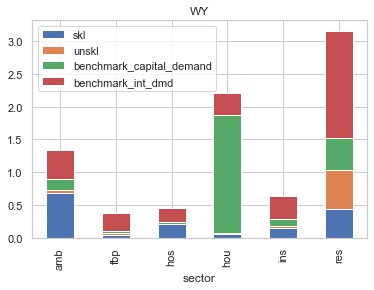

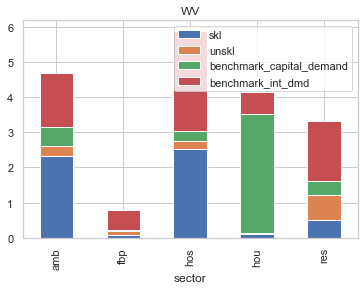

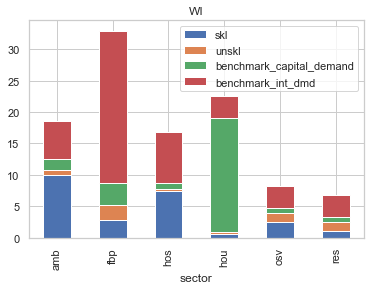

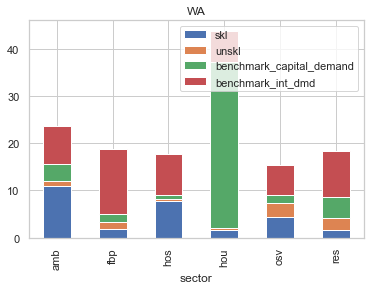

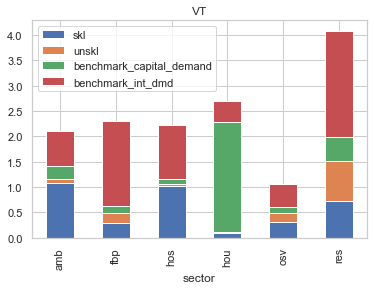

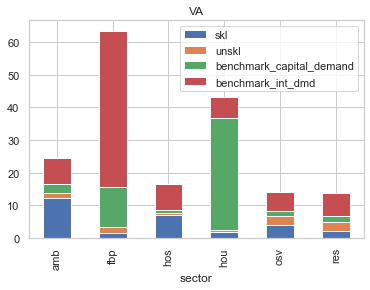

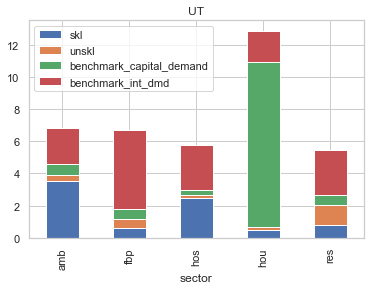

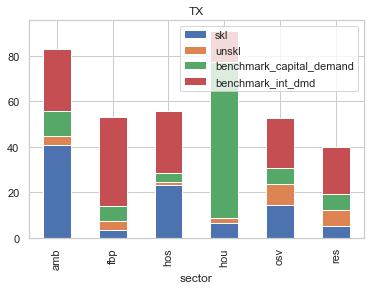

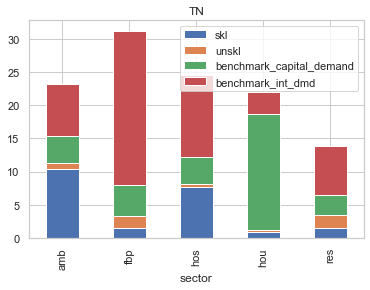

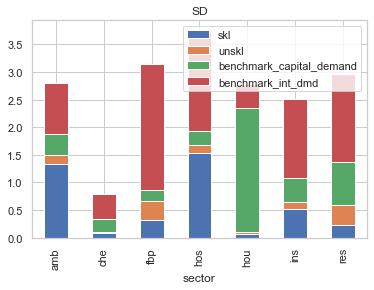

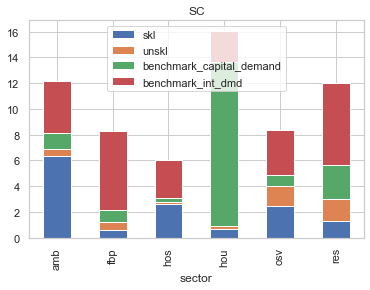

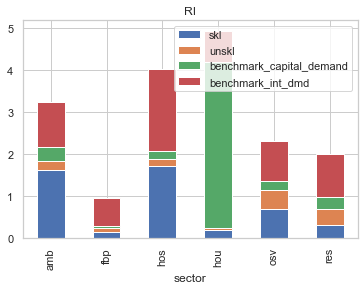

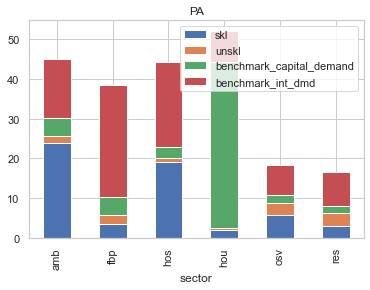

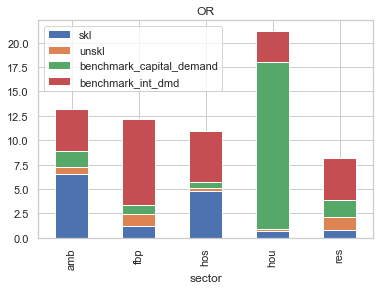

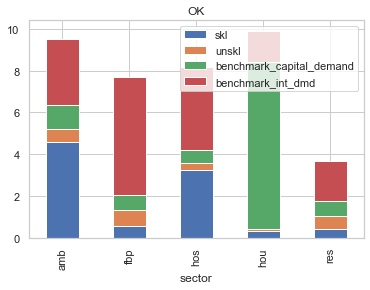

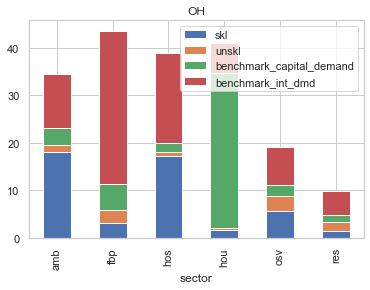

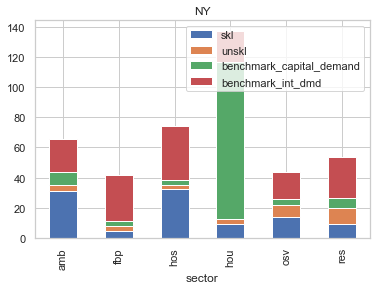

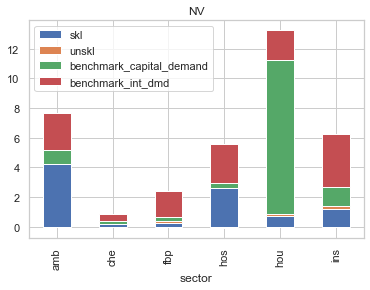

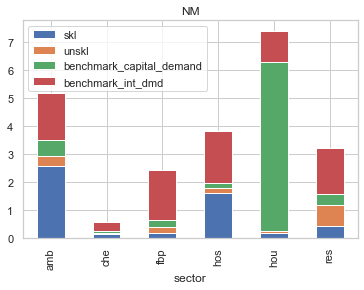

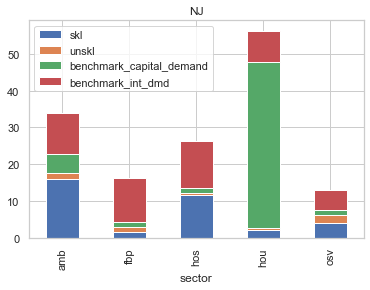

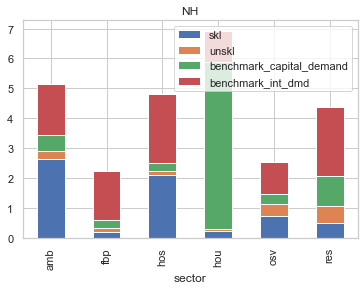

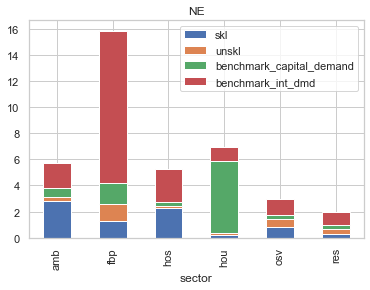

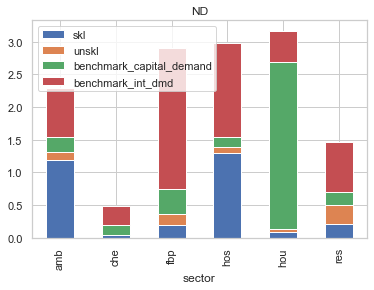

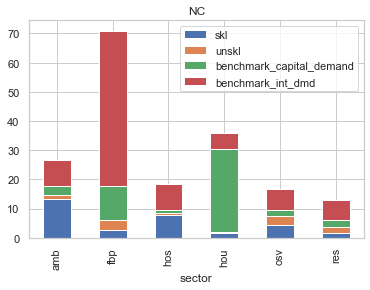

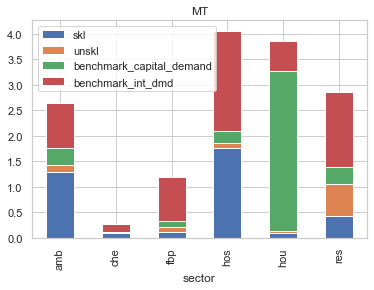

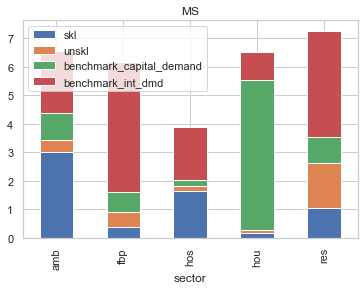

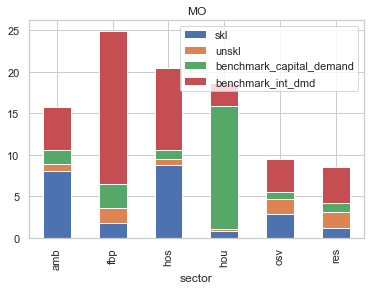

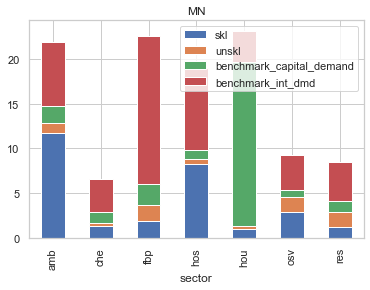

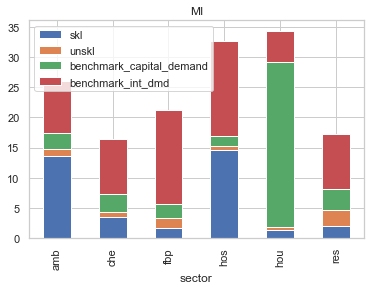

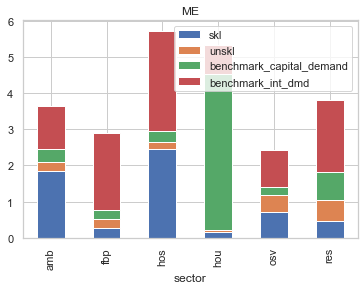

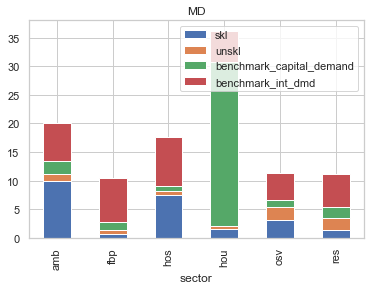

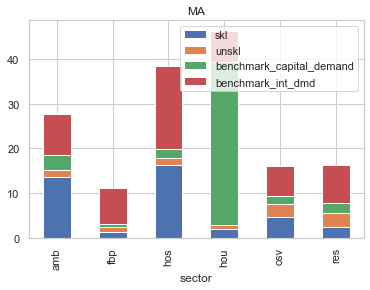

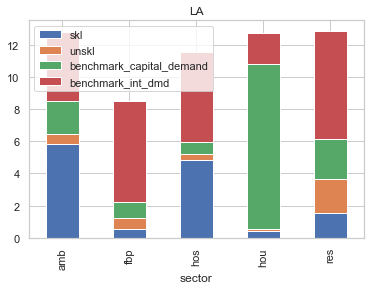

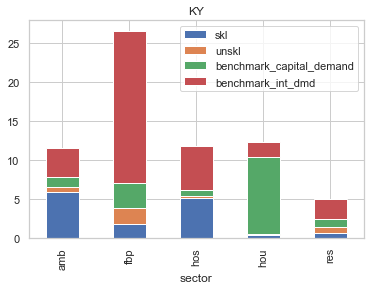

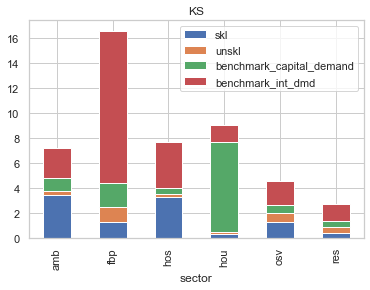

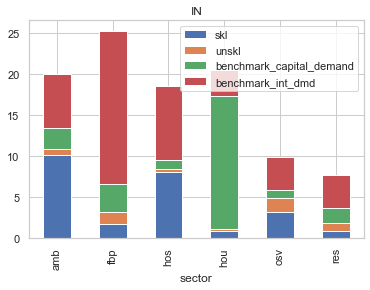

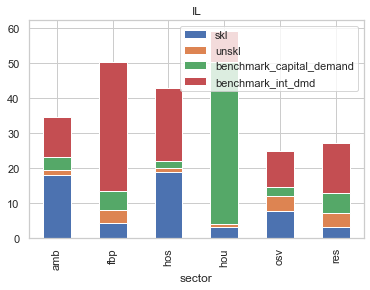

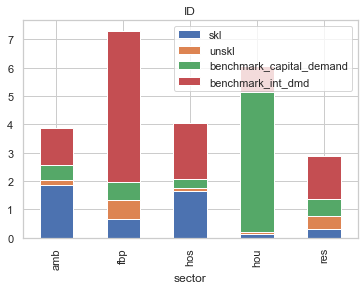

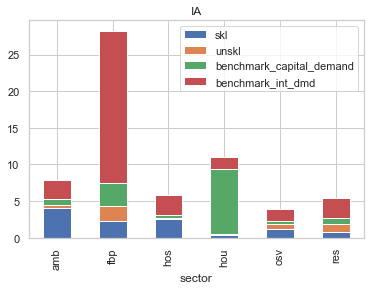

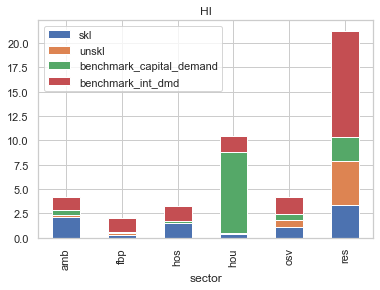

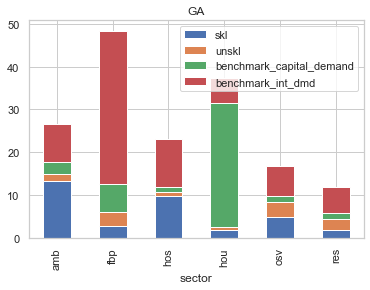

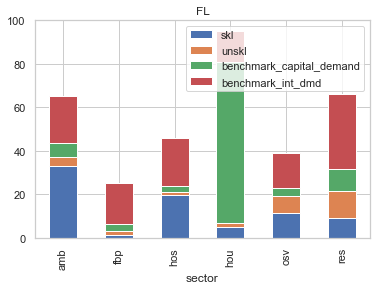

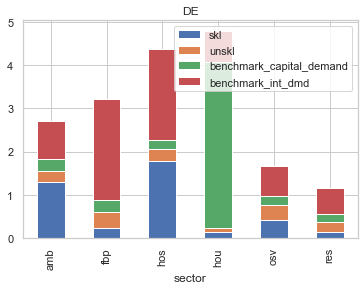

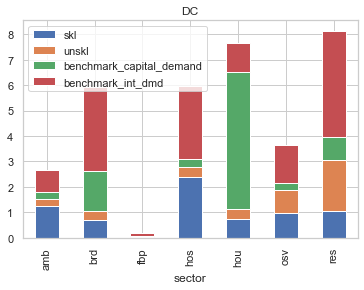

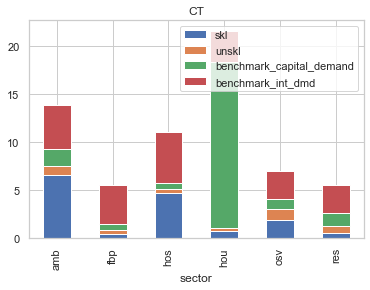

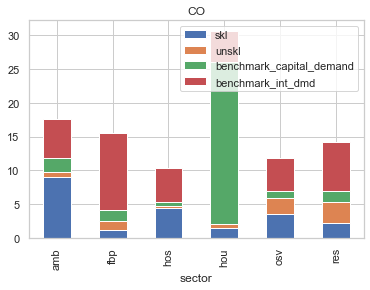

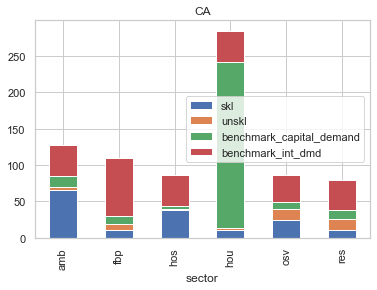

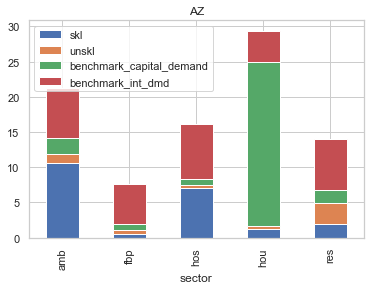

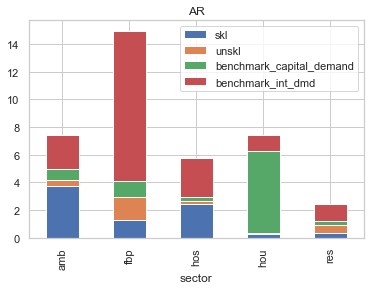

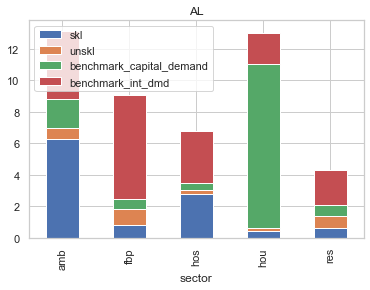

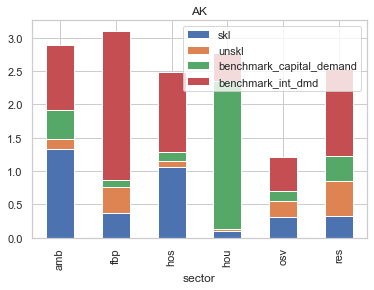

In [116]:
cd0_gr=cd0_gr.sort_values(by=['region','pct_budget'],ascending=False)

df=pd.DataFrame()

for region in cd0_gr['region'].unique():
    tmp=cd0_gr[(cd0_gr['region']==region) & (cd0_gr['pct_budget']> cd0_gr['pct_budget'].quantile(q=.90))]
    goods_list=tmp['good'].unique()
    int_goods_tmp=int_goods[(int_goods['region']==region) & (int_goods['sector'].isin(goods_list))]
    int_goods_tmp.set_index('sector').plot(kind='bar', stacked=True)
    plt.title(region)
    df=df.append(tmp)

### Get Share capital and labor endowment by household

In [21]:


cons_endow=ke0_d_rpt.merge(le0_d_rpt,on=['region','household']).groupby(['region','household'],as_index=False).sum()